In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

In [169]:
data=pd.read_csv('Downloads\mobile_price_classification.csv')
data

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1,842,0,2.2,0,1.0,0,7,0.6,188.0,...,20,756,2549.0,9,7,19,0,0,1,1
1,2,1021,1,0.5,1,NaN,1,53,0.7,136.0,...,905,1988,NaN,17,3,7,1,1,0,2
2,3,563,1,0.5,1,2.0,1,41,0.9,NaN,...,1263,1716,2603.0,11,2,9,1,1,0,2
3,4,615,1,2.5,0,NaN,0,10,0.8,131.0,...,1216,1786,2769.0,16,8,11,1,0,0,2
4,5,1821,1,1.2,0,13.0,1,44,NaN,141.0,...,1208,1212,1411.0,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997,1996,794,1,0.5,1,0.0,1,2,0.8,106.0,...,1222,1890,668.0,13,4,19,1,1,0,0
1998,1997,1965,1,2.6,1,0.0,0,39,0.2,187.0,...,915,1965,2032.0,11,10,16,1,1,1,2
1999,1998,1911,0,0.9,1,1.0,1,36,0.7,108.0,...,868,1632,3057.0,9,1,5,1,1,0,3
2000,1999,1512,0,0.9,0,4.0,1,46,0.1,145.0,...,336,670,869.0,18,10,19,1,1,1,0


In [170]:
data.shape

(2002, 22)

In [171]:
data=data.drop('id',axis =1)
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0,7,0.6,188.0,2,...,20,756,2549.0,9,7,19,0,0,1,1
1,1021,1,0.5,1,NaN,1,53,0.7,136.0,3,...,905,1988,NaN,17,3,7,1,1,0,2
2,563,1,0.5,1,2.0,1,41,0.9,NaN,5,...,1263,1716,2603.0,11,2,9,1,1,0,2
3,615,1,2.5,0,NaN,0,10,0.8,131.0,6,...,1216,1786,2769.0,16,8,11,1,0,0,2
4,1821,1,1.2,0,13.0,1,44,NaN,141.0,2,...,1208,1212,1411.0,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997,794,1,0.5,1,0.0,1,2,0.8,106.0,6,...,1222,1890,668.0,13,4,19,1,1,0,0
1998,1965,1,2.6,1,0.0,0,39,0.2,187.0,4,...,915,1965,2032.0,11,10,16,1,1,1,2
1999,1911,0,0.9,1,1.0,1,36,0.7,108.0,8,...,868,1632,3057.0,9,1,5,1,1,0,3
2000,1512,0,0.9,0,4.0,1,46,0.1,145.0,5,...,336,670,869.0,18,10,19,1,1,1,0


In [172]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2002.000000,2002.000000,2002.000000,2002.000000,1995.000000,2002.000000,2002.000000,1997.000000,1996.000000,2002.000000,...,2002.000000,2002.000000,2000.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000
mean,1238.485514,0.494505,1.522428,0.509491,4.319799,0.521479,32.037463,0.502053,141.289579,4.520979,...,644.652847,1251.457043,2128.750000,12.306194,5.767732,11.008492,0.761738,0.502498,0.506494,1.499500
std,439.389628,0.500095,0.815769,0.500035,4.341836,0.499663,18.144296,0.288578,45.313271,2.287617,...,443.792863,431.988140,1096.826623,4.212218,4.354540,5.462372,0.426126,0.500119,0.500083,1.117866
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.250000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.000000,875.250000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,1.000000
50%,1226.000000,0.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2145.000000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.000000
75%,1615.000000,1.000000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,946.750000,1632.750000,3069.000000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.000000
max,1998.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,960.000000,8.000000,...,1960.000000,1998.000000,7286.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [173]:
data= data.rename(columns={"blue" : "bluetooth",
                           "fc" : "fc_megapixel",
                           "pc" : "pc_megapixel",
                           "m_dep" : "m_depth"
                          })
data

,battery_power,bluetooth,clock_speed,dual_sim,fc_megapixel,four_g,int_memory,m_depth,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0,7,0.6,188.0,2,...,20,756,2549.0,9,7,19,0,0,1,1
1,1021,1,0.5,1,NaN,1,53,0.7,136.0,3,...,905,1988,NaN,17,3,7,1,1,0,2
2,563,1,0.5,1,2.0,1,41,0.9,NaN,5,...,1263,1716,2603.0,11,2,9,1,1,0,2
3,615,1,2.5,0,NaN,0,10,0.8,131.0,6,...,1216,1786,2769.0,16,8,11,1,0,0,2
4,1821,1,1.2,0,13.0,1,44,NaN,141.0,2,...,1208,1212,1411.0,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997,794,1,0.5,1,0.0,1,2,0.8,106.0,6,...,1222,1890,668.0,13,4,19,1,1,0,0
1998,1965,1,2.6,1,0.0,0,39,0.2,187.0,4,...,915,1965,2032.0,11,10,16,1,1,1,2
1999,1911,0,0.9,1,1.0,1,36,0.7,108.0,8,...,868,1632,3057.0,9,1,5,1,1,0,3
2000,1512,0,0.9,0,4.0,1,46,0.1,145.0,5,...,336,670,869.0,18,10,19,1,1,1,0


In [174]:
dupes=data.duplicated()
dupes

0       False
1       False
2       False
3       False
4       False
        ...  
1997    False
1998    False
1999    False
2000    False
2001    False
Length: 2002, dtype: bool

In [175]:
data=data.drop_duplicates()
data

,battery_power,bluetooth,clock_speed,dual_sim,fc_megapixel,four_g,int_memory,m_depth,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0,7,0.6,188.0,2,...,20,756,2549.0,9,7,19,0,0,1,1
1,1021,1,0.5,1,NaN,1,53,0.7,136.0,3,...,905,1988,NaN,17,3,7,1,1,0,2
2,563,1,0.5,1,2.0,1,41,0.9,NaN,5,...,1263,1716,2603.0,11,2,9,1,1,0,2
3,615,1,2.5,0,NaN,0,10,0.8,131.0,6,...,1216,1786,2769.0,16,8,11,1,0,0,2
4,1821,1,1.2,0,13.0,1,44,NaN,141.0,2,...,1208,1212,1411.0,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997,794,1,0.5,1,0.0,1,2,0.8,106.0,6,...,1222,1890,668.0,13,4,19,1,1,0,0
1998,1965,1,2.6,1,0.0,0,39,0.2,187.0,4,...,915,1965,2032.0,11,10,16,1,1,1,2
1999,1911,0,0.9,1,1.0,1,36,0.7,108.0,8,...,868,1632,3057.0,9,1,5,1,1,0,3
2000,1512,0,0.9,0,4.0,1,46,0.1,145.0,5,...,336,670,869.0,18,10,19,1,1,1,0


In [176]:
data.isnull().sum()

battery_power    0
bluetooth        0
clock_speed      0
dual_sim         0
fc_megapixel     7
four_g           0
int_memory       0
m_depth          5
mobile_wt        6
n_cores          0
pc_megapixel     0
px_height        0
px_width         0
ram              2
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [177]:
data['fc_megapixel']=data['fc_megapixel'].fillna(0)
data.isnull().sum()

C:\Users\zeelh\AppData\Local\Temp\ipykernel_16124\3095485640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['fc_megapixel']=data['fc_megapixel'].fillna(0)


battery_power    0
bluetooth        0
clock_speed      0
dual_sim         0
fc_megapixel     0
four_g           0
int_memory       0
m_depth          5
mobile_wt        6
n_cores          0
pc_megapixel     0
px_height        0
px_width         0
ram              2
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [178]:
len(data['ram'].unique())

1562

In [179]:
data['ram']=data['ram'].fillna(method='backfill')
data.isnull().sum()

C:\Users\zeelh\AppData\Local\Temp\ipykernel_16124\40770695.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ram']=data['ram'].fillna(method='backfill')


battery_power    0
bluetooth        0
clock_speed      0
dual_sim         0
fc_megapixel     0
four_g           0
int_memory       0
m_depth          5
mobile_wt        6
n_cores          0
pc_megapixel     0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [180]:
data['mobile_wt']=data['mobile_wt'].fillna(data['mobile_wt'].median())
data.isnull().sum()

C:\Users\zeelh\AppData\Local\Temp\ipykernel_16124\246209243.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mobile_wt']=data['mobile_wt'].fillna(data['mobile_wt'].median())


battery_power    0
bluetooth        0
clock_speed      0
dual_sim         0
fc_megapixel     0
four_g           0
int_memory       0
m_depth          5
mobile_wt        0
n_cores          0
pc_megapixel     0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [181]:
data=data.dropna()
data.shape

(1995, 21)

In [182]:
data.to_csv('mobile_data_cleaned.csv,index= false')
data

,battery_power,bluetooth,clock_speed,dual_sim,fc_megapixel,four_g,int_memory,m_depth,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0,7,0.6,188.0,2,...,20,756,2549.0,9,7,19,0,0,1,1
1,1021,1,0.5,1,0.0,1,53,0.7,136.0,3,...,905,1988,2603.0,17,3,7,1,1,0,2
2,563,1,0.5,1,2.0,1,41,0.9,141.0,5,...,1263,1716,2603.0,11,2,9,1,1,0,2
3,615,1,2.5,0,0.0,0,10,0.8,131.0,6,...,1216,1786,2769.0,16,8,11,1,0,0,2
5,1859,0,0.5,1,3.0,0,22,0.7,164.0,1,...,1004,1654,1067.0,17,1,10,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997,794,1,0.5,1,0.0,1,2,0.8,106.0,6,...,1222,1890,668.0,13,4,19,1,1,0,0
1998,1965,1,2.6,1,0.0,0,39,0.2,187.0,4,...,915,1965,2032.0,11,10,16,1,1,1,2
1999,1911,0,0.9,1,1.0,1,36,0.7,108.0,8,...,868,1632,3057.0,9,1,5,1,1,0,3
2000,1512,0,0.9,0,4.0,1,46,0.1,145.0,5,...,336,670,869.0,18,10,19,1,1,1,0


In [183]:
numeric_data=data.drop(['bluetooth','dual_sim','four_g','three_g',
                        'touch_screen','wifi','price_range'], axis=1)
numeric_data

,battery_power,clock_speed,fc_megapixel,int_memory,m_depth,mobile_wt,n_cores,pc_megapixel,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,2.2,1.0,7,0.6,188.0,2,2,20,756,2549.0,9,7,19
1,1021,0.5,0.0,53,0.7,136.0,3,6,905,1988,2603.0,17,3,7
2,563,0.5,2.0,41,0.9,141.0,5,6,1263,1716,2603.0,11,2,9
3,615,2.5,0.0,10,0.8,131.0,6,9,1216,1786,2769.0,16,8,11
5,1859,0.5,3.0,22,0.7,164.0,1,7,1004,1654,1067.0,17,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997,794,0.5,0.0,2,0.8,106.0,6,14,1222,1890,668.0,13,4,19
1998,1965,2.6,0.0,39,0.2,187.0,4,3,915,1965,2032.0,11,10,16
1999,1911,0.9,1.0,36,0.7,108.0,8,3,868,1632,3057.0,9,1,5
2000,1512,0.9,4.0,46,0.1,145.0,5,5,336,670,869.0,18,10,19


In [184]:
cat_data=data[{'bluetooth','dual_sim','four_g','three_g',
              'touch_screen','wifi','price_range'}]
cat_data

C:\Users\zeelh\AppData\Local\Temp\ipykernel_16124\2507022409.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  cat_data=data[{'bluetooth','dual_sim','four_g','three_g',


,bluetooth,price_range,dual_sim,three_g,four_g,wifi,touch_screen
0,0,1,0,0,0,1,0
1,1,2,1,1,1,0,1
2,1,2,1,1,1,0,1
3,1,2,0,1,0,0,0
5,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...
1997,1,0,1,1,1,0,1
1998,1,2,1,1,0,1,1
1999,0,3,1,1,1,0,1
2000,0,0,0,1,1,1,1


D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='ram'>

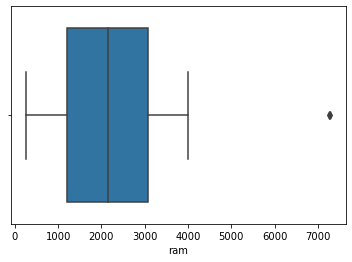

In [185]:
sns.boxplot(numeric_data['ram'],orient='v')

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='mobile_wt'>

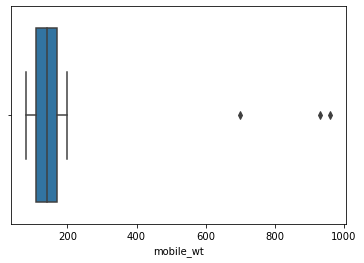

In [186]:
sns.boxplot(numeric_data['mobile_wt'],orient='v')

[Text(0, 0, 'battery_power'),
 Text(1, 0, 'clock_speed'),
 Text(2, 0, 'fc_megapixel'),
 Text(3, 0, 'int_memory'),
 Text(4, 0, 'm_depth'),
 Text(5, 0, 'mobile_wt'),
 Text(6, 0, 'n_cores'),
 Text(7, 0, 'pc_megapixel'),
 Text(8, 0, 'px_height'),
 Text(9, 0, 'px_width'),
 Text(10, 0, 'ram'),
 Text(11, 0, 'sc_h'),
 Text(12, 0, 'sc_w'),
 Text(13, 0, 'talk_time')]

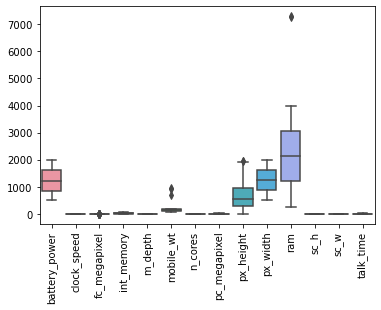

In [187]:
bp=sns.boxplot(data=numeric_data)
bp.set_xticklabels(bp.get_xticklabels(),rotation=90)

In [188]:
scaler=StandardScaler()
scaled_array=scaler.fit_transform(numeric_data)

In [189]:
scaled_data=pd.DataFrame(scaled_array,columns = numeric_data.columns)
scaled_data.head()

,battery_power,clock_speed,fc_megapixel,int_memory,m_depth,mobile_wt,n_cores,pc_megapixel,px_height,px_width,ram,sc_h,sc_w,talk_time
0,-0.902710,0.828590,-0.760901,-1.379076,0.339647,1.032457,-1.100614,-1.305274,-1.410473,-1.145740,0.383289,-0.787860,0.281262,1.461538
1,-0.495016,-1.254710,-0.991355,1.155222,0.686421,-0.115603,-0.663393,-0.645778,0.588764,1.703940,0.432536,1.112147,-0.636722,-0.734484
2,-1.538165,-1.254710,-0.530448,0.494101,1.379968,-0.005212,0.211050,-0.645778,1.397495,1.074790,0.432536,-0.312858,-0.866218,-0.368480
3,-1.419729,1.196232,-0.991355,-1.213795,1.033195,-0.225993,0.648271,-0.151155,1.291321,1.236704,0.583926,0.874646,0.510758,-0.002477
4,1.413628,-1.254710,-0.299994,-0.552674,0.686421,0.502583,-1.537835,-0.480903,0.812408,0.931381,-0.968275,1.112147,-1.095714,-0.185479


In [190]:
scaled_data.describe()

,battery_power,clock_speed,fc_megapixel,int_memory,m_depth,mobile_wt,n_cores,pc_megapixel,px_height,px_width,ram,sc_h,sc_w,talk_time
count,1.995000e+03,1.995000e+03,1.995000e+03,1.995000e+03,1.995000e+03,1.995000e+03,1.995000e+03,1.995000e+03,1.995000e+03,1.995000e+03,1.995000e+03,1.995000e+03,1.995000e+03,1.995000e+03
mean,-1.090745e-16,1.582694e-16,-4.273941e-17,-3.283366e-18,-2.971725e-17,-5.448162e-17,1.631666e-16,4.986265e-17,-1.111336e-16,-2.190395e-16,-4.452022e-18,7.423747e-17,7.949642e-17,-5.453727e-17
std,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00
min,-1.679377e+00,-1.254710e+00,-9.913549e-01,-1.654543e+00,-1.394222e+00,-1.351975e+00,-1.537835e+00,-1.635022e+00,-1.455654e+00,-1.737881e+00,-1.707896e+00,-1.737864e+00,-1.325210e+00,-1.649493e+00
25%,-8.799334e-01,-1.009616e+00,-7.609013e-01,-8.832348e-01,-1.047448e+00,-7.117106e-01,-6.633928e-01,-8.106517e-01,-8.174790e-01,-8.727999e-01,-8.405968e-01,-7.878601e-01,-8.662179e-01,-9.174857e-01
50%,-3.038194e-02,-2.923931e-02,-2.999940e-01,-1.739793e-03,-7.126678e-03,-5.212416e-03,-2.261716e-01,1.371885e-02,-1.815634e-01,-1.003134e-02,1.575839e-02,-7.535743e-02,-1.777300e-01,-2.476716e-03
75%,8.567502e-01,8.285904e-01,6.218205e-01,8.797552e-01,1.033195e+00,6.350516e-01,1.085492e+00,8.380894e-01,6.802548e-01,8.828069e-01,8.556979e-01,8.746462e-01,7.402540e-01,9.125322e-01
max,1.730217e+00,1.808967e+00,3.387264e+00,1.761250e+00,1.726742e+00,1.807673e+01,1.522713e+00,1.662460e+00,2.972036e+00,1.727071e+00,4.703368e+00,1.587149e+00,2.805718e+00,1.644539e+00


In [191]:
scaled_data=scaled_data.reset_index()
scaled_data

,index,battery_power,clock_speed,fc_megapixel,int_memory,m_depth,mobile_wt,n_cores,pc_megapixel,px_height,px_width,ram,sc_h,sc_w,talk_time
0,0,-0.902710,0.828590,-0.760901,-1.379076,0.339647,1.032457,-1.100614,-1.305274,-1.410473,-1.145740,0.383289,-0.787860,0.281262,1.461538
1,1,-0.495016,-1.254710,-0.991355,1.155222,0.686421,-0.115603,-0.663393,-0.645778,0.588764,1.703940,0.432536,1.112147,-0.636722,-0.734484
2,2,-1.538165,-1.254710,-0.530448,0.494101,1.379968,-0.005212,0.211050,-0.645778,1.397495,1.074790,0.432536,-0.312858,-0.866218,-0.368480
3,3,-1.419729,1.196232,-0.991355,-1.213795,1.033195,-0.225993,0.648271,-0.151155,1.291321,1.236704,0.583926,0.874646,0.510758,-0.002477
4,4,1.413628,-1.254710,-0.299994,-0.552674,0.686421,0.502583,-1.537835,-0.480903,0.812408,0.931381,-0.968275,1.112147,-1.095714,-0.185479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,1990,-1.012035,-1.254710,-0.991355,-1.654543,1.033195,-0.777945,0.648271,0.673215,1.304875,1.477261,-1.332157,0.162143,-0.407226,1.461538
1991,1991,1.655055,1.318779,-0.991355,0.383914,-1.047448,1.010379,-0.226172,-1.140400,0.611355,1.650740,-0.088208,-0.312858,0.969750,0.912532
1992,1992,1.532064,-0.764522,-0.760901,0.218634,0.686421,-0.733789,1.522713,-1.140400,0.505180,0.880494,0.846578,-0.787860,-1.095714,-1.100487
1993,1993,0.623294,-0.764522,-0.069540,0.769568,-1.394222,0.083100,0.211050,-0.810652,-0.696621,-1.344663,-1.148848,1.349648,0.969750,1.461538


In [192]:
cat_data=cat_data.reset_index()
cat_data

,index,bluetooth,price_range,dual_sim,three_g,four_g,wifi,touch_screen
0,0,0,1,0,0,0,1,0
1,1,1,2,1,1,1,0,1
2,2,1,2,1,1,1,0,1
3,3,1,2,0,1,0,0,0
4,5,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...
1990,1997,1,0,1,1,1,0,1
1991,1998,1,2,1,1,0,1,1
1992,1999,0,3,1,1,1,0,1
1993,2000,0,0,0,1,1,1,1


In [193]:
final=pd.concat([scaled_data,cat_data], axis=1)
final.head()

,index,battery_power,clock_speed,fc_megapixel,int_memory,m_depth,mobile_wt,n_cores,pc_megapixel,px_height,...,sc_w,talk_time,index,bluetooth,price_range,dual_sim,three_g,four_g,wifi,touch_screen
0,0,-0.902710,0.828590,-0.760901,-1.379076,0.339647,1.032457,-1.100614,-1.305274,-1.410473,...,0.281262,1.461538,0,0,1,0,0,0,1,0
1,1,-0.495016,-1.254710,-0.991355,1.155222,0.686421,-0.115603,-0.663393,-0.645778,0.588764,...,-0.636722,-0.734484,1,1,2,1,1,1,0,1
2,2,-1.538165,-1.254710,-0.530448,0.494101,1.379968,-0.005212,0.211050,-0.645778,1.397495,...,-0.866218,-0.368480,2,1,2,1,1,1,0,1
3,3,-1.419729,1.196232,-0.991355,-1.213795,1.033195,-0.225993,0.648271,-0.151155,1.291321,...,0.510758,-0.002477,3,1,2,0,1,0,0,0
4,4,1.413628,-1.254710,-0.299994,-0.552674,0.686421,0.502583,-1.537835,-0.480903,0.812408,...,-1.095714,-0.185479,5,0,1,1,1,0,0,0


In [194]:
final.isnull().sum()

index            0
battery_power    0
clock_speed      0
fc_megapixel     0
int_memory       0
m_depth          0
mobile_wt        0
n_cores          0
pc_megapixel     0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
index            0
bluetooth        0
price_range      0
dual_sim         0
three_g          0
four_g           0
wifi             0
touch_screen     0
dtype: int64

In [195]:
x=final.drop('price_range',axis=1)
y=final['price_range']

In [196]:
x_train,x_test,y_train,y_test=train_test_split(x,y,
                                               test_size=0.20,
                                               random_state=20)
x_train.shape , x_test.shape

((1596, 22), (399, 22))

# Logistic Regression

In [197]:
logistic_model = LogisticRegression()

In [198]:
logistic_model.fit(x_train,y_train)

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [199]:
print(logistic_model.score(x_train,y_train))
print(logistic_model.score(x_test,y_test))

0.9141604010025063
0.899749373433584


In [200]:
y_pred = logistic_model.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.899749373433584


In [201]:
cm =metrics.confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm)
cr= classification_report(y_test,y_pred)
print(cm)
print(cr)

[[87  6  0  0]
 [12 85  2  0]
 [ 0  4 90  8]
 [ 0  0  8 97]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        93
           1       0.89      0.86      0.88        99
           2       0.90      0.88      0.89       102
           3       0.92      0.92      0.92       105

    accuracy                           0.90       399
   macro avg       0.90      0.90      0.90       399
weighted avg       0.90      0.90      0.90       399



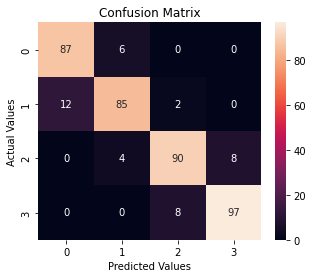

In [202]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

# Decision Tree

In [203]:
DecisionTree_model = DecisionTreeClassifier()
DecisionTree_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [204]:
print(DecisionTree_model.score(x_train,y_train))
print(DecisionTree_model.score(x_test,y_test))

1.0
0.8095238095238095


In [205]:
y_pred = DecisionTree_model.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.8095238095238095


In [206]:
cm2 =metrics.confusion_matrix(y_test, y_pred)
cm_df2 = pd.DataFrame(cm2)
cr2= classification_report(y_test,y_pred)
print(cm2)
print(cr2)

[[81 12  0  0]
 [14 72 13  0]
 [ 0 16 74 12]
 [ 0  0  9 96]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        93
           1       0.72      0.73      0.72        99
           2       0.77      0.73      0.75       102
           3       0.89      0.91      0.90       105

    accuracy                           0.81       399
   macro avg       0.81      0.81      0.81       399
weighted avg       0.81      0.81      0.81       399



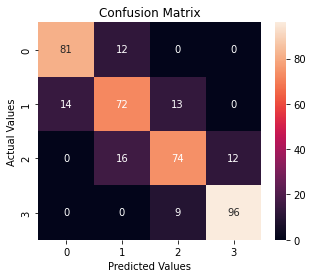

In [207]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df2, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

# Support Vector Machine

In [208]:
SVC_model = SVC()
SVC_model.fit(x_train,y_train)

SVC()

In [209]:
print(SVC_model.score(x_train,y_train))
print(SVC_model.score(x_test,y_test))

0.27130325814536344
0.2681704260651629


In [210]:
y_pred = SVC_model.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.2681704260651629


In [211]:
cm3 =metrics.confusion_matrix(y_test, y_pred)
cm_df3 = pd.DataFrame(cm3)
cr3= classification_report(y_test,y_pred)
print(cm3)
print(cr3)

[[16 41  2 34]
 [12 45  0 42]
 [10 55  0 37]
 [15 44  0 46]]
              precision    recall  f1-score   support

           0       0.30      0.17      0.22        93
           1       0.24      0.45      0.32        99
           2       0.00      0.00      0.00       102
           3       0.29      0.44      0.35       105

    accuracy                           0.27       399
   macro avg       0.21      0.27      0.22       399
weighted avg       0.21      0.27      0.22       399



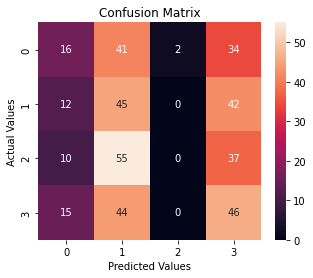

In [212]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df3, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

# K-Nearest Neighbours

In [213]:
KN_model=KNeighborsClassifier()
KN_model.fit(x_train,y_train)

KNeighborsClassifier()

In [214]:
print(KN_model.score(x_train,y_train))
print(KN_model.score(x_test,y_test))

0.5081453634085213
0.2531328320802005


In [215]:
y_pred = KN_model.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.2531328320802005


In [216]:
cm4 =metrics.confusion_matrix(y_test, y_pred)
cm_df4 = pd.DataFrame(cm4)
cr4= classification_report(y_test,y_pred)
print(cm4)
print(cr4)

[[34 29 22  8]
 [40 27 18 14]
 [28 34 30 10]
 [36 35 24 10]]
              precision    recall  f1-score   support

           0       0.25      0.37      0.29        93
           1       0.22      0.27      0.24        99
           2       0.32      0.29      0.31       102
           3       0.24      0.10      0.14       105

    accuracy                           0.25       399
   macro avg       0.25      0.26      0.24       399
weighted avg       0.26      0.25      0.24       399



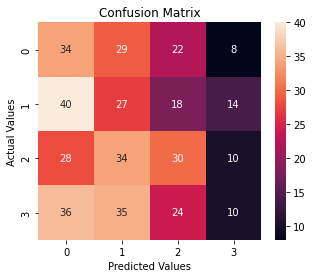

In [217]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df4, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

# Random Forest

In [218]:
RandomForestClassifier_model=RandomForestClassifier()
RandomForestClassifier_model.fit(x_train,y_train)

RandomForestClassifier()

In [219]:
print(RandomForestClassifier_model.score(x_train,y_train))
print(RandomForestClassifier_model.score(x_test,y_test))

1.0
0.8596491228070176


In [220]:
y_pred = RandomForestClassifier_model.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.8596491228070176


In [221]:
cm5 =metrics.confusion_matrix(y_test, y_pred)
cm_df5 = pd.DataFrame(cm5)
cr5= classification_report(y_test,y_pred)
print(cm5)
print(cr5)

[[87  6  0  0]
 [ 8 84  7  0]
 [ 0 15 77 10]
 [ 0  0 10 95]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        93
           1       0.80      0.85      0.82        99
           2       0.82      0.75      0.79       102
           3       0.90      0.90      0.90       105

    accuracy                           0.86       399
   macro avg       0.86      0.86      0.86       399
weighted avg       0.86      0.86      0.86       399



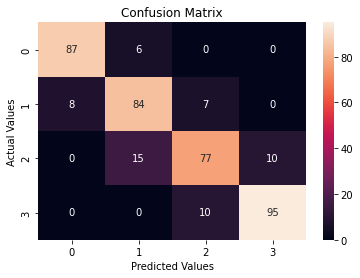

In [222]:
sns.heatmap(cm_df5, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

# saving model

In [223]:
import pickle
filename='finalized_model.sav'
pickle.dump(DecisionTree_model,open(filename,"wb"))

# Loading Model

In [224]:
loaded_model=pickle.load(open(filename,'rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.8095238095238095
